In [62]:
import numpy as np
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = pd.read_csv('complete_unscaled_dataset2.csv', index_col = 0, header = [0])
#Fit e scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(data=X_scaled, index = X.index, columns = X.columns)
X_scaled_df.index.name = 'track_id'

tracks_genres = pd.read_csv('tracks_genres_mio2.csv', index_col = 0, header = [0])
#Alcune tracce presenti in tracks_genres.csv potrebbero non funzionare, quindi tengo solo le tracce di cui sono riuscito ad estrarre le feature
y = tracks_genres.loc[X.index,  'genre']

df = X_scaled_df.join([y])


In [63]:
N = 8000
df_rock = df.loc[df['genre'] == 'Rock']
df_rock_subset = df_rock.sample(n = N//8) 

df_electronic = df.loc[df['genre'] == 'Electronic']
df_electronic_subset = df_electronic.sample(n = N//8) 

df_hiphop = df.loc[df['genre'] == 'Hip-Hop']
df_hiphop_subset = df_hiphop.sample(n = N//8) 

df_pop = df.loc[df['genre'] == 'Pop']
df_pop_subset = df_pop.sample(n = N//8) 

df_instrumental = df.loc[df['genre'] == 'Instrumental']
df_instrumental_subset = df_instrumental.sample(n = N//8) 

df_experimental = df.loc[df['genre'] == 'Experimental']
df_experimental_subset = df_experimental.sample(n = N//8) 

df_folk = df.loc[df['genre'] == 'Folk']
df_folk_subset = df_folk.sample(n = N//8) 

df_international = df.loc[df['genre'] == 'International']
df_international_subset = df_international.sample(n = N//8) 

df_subset = df_rock_subset.append([df_electronic_subset, df_hiphop_subset, df_pop_subset, df_instrumental_subset, df_experimental_subset, df_folk_subset, df_international_subset])

data_subset = df_subset.loc[:, df_subset.columns != 'genre']

In [64]:
#Faccio PCA
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8321594155000879


In [65]:
#Faccio t-SNE
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 26.53041958808899 seconds


In [66]:
ipd.display(df_subset)

,"('mfcc', 'mean', '1')","('mfcc', 'mean', '2')","('mfcc', 'mean', '3')","('mfcc', 'mean', '4')","('mfcc', 'mean', '5')","('mfcc', 'mean', '6')","('mfcc', 'mean', '7')","('mfcc', 'mean', '8')","('mfcc', 'mean', '9')","('mfcc', 'mean', '10')",...,"('contrast', 'skew', '4')","('contrast', 'skew', '5')","('contrast', 'skew', '6')","('contrast', 'kurtosis', '1')","('contrast', 'kurtosis', '2')","('contrast', 'kurtosis', '3')","('contrast', 'kurtosis', '4')","('contrast', 'kurtosis', '5')","('contrast', 'kurtosis', '6')",genre
track_id,,,,,,,,,,,,,,,,,,,,,
83042,1.220713,-0.104233,0.509725,0.159649,-0.109093,-0.020992,-0.017244,-0.817615,-0.443235,-0.658906,...,0.681745,0.609076,-0.427234,-0.760645,-0.031157,-0.228937,0.279201,0.759215,-0.361247,Rock
59224,0.561580,-0.029306,-1.517733,1.157740,0.357099,-1.109142,-0.303573,0.446556,-0.978477,-0.576272,...,0.230338,-0.124428,-0.379816,-0.224359,0.118858,0.112047,-0.029806,0.107182,-0.429848,Rock
126597,0.969667,0.383921,0.311678,-0.323152,-1.669046,-1.124596,-1.440062,0.792714,-0.982333,0.036904,...,-0.167224,0.047111,0.247699,0.681143,0.563178,-0.343578,-0.266521,-0.280616,0.039110,Rock
88925,0.777033,-0.834620,-0.779672,-1.158445,-0.918958,0.506055,-0.835527,0.489599,-0.040355,-0.152109,...,-0.846707,-0.628299,-0.534387,-0.273481,0.071748,-1.050573,-0.660157,-0.484734,-0.350476,Rock
71720,0.033715,-0.050125,-1.765124,2.085448,0.601932,-0.250023,1.657729,0.906991,0.208633,1.257279,...,-0.775179,-0.466044,-0.491964,0.823733,0.051032,-0.999316,-0.771316,-0.784294,-0.739798,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,1.111141,-1.469007,0.902682,0.071612,-0.280265,0.795665,-1.521774,0.689229,0.664715,0.896845,...,0.481923,0.810861,0.561317,-0.968729,-0.382273,-0.481249,-0.251605,-0.071553,0.067962,International
59719,0.302551,-0.445738,-2.319147,-0.936678,-2.713550,-1.902269,-3.691824,-1.599698,-1.986930,-2.273688,...,-1.134370,-1.506398,-1.490619,-0.997686,-0.340315,-0.173788,-0.385731,-0.523709,-0.622166,International
6358,0.050138,0.245558,-0.859608,-0.433810,-1.424248,-0.175532,-1.082702,-0.589783,-0.976551,-0.847216,...,0.302648,-0.586035,-0.449454,0.676500,0.099943,0.481937,0.130258,-0.616747,-0.538352,International


<AxesSubplot:xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

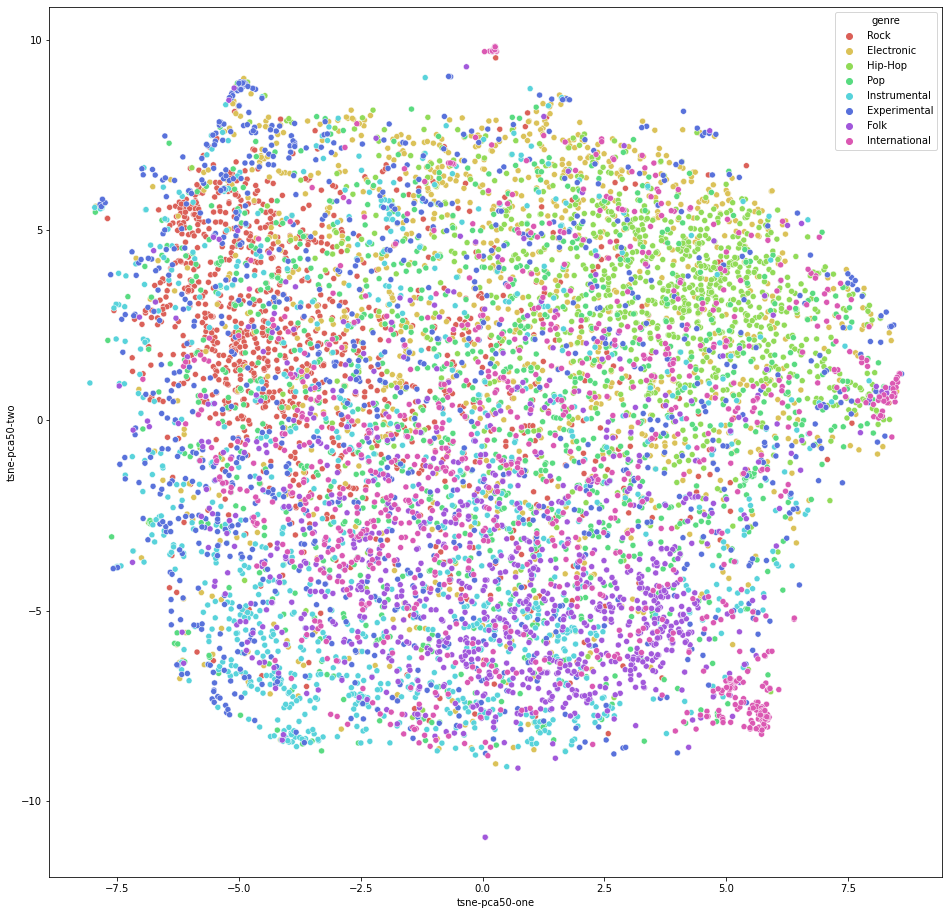

In [67]:
import matplotlib.pyplot  as plt
import seaborn as sns

df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,16))

sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="genre",
    palette=sns.color_palette("hls", 8),
    data=df_subset,
    legend="full",
    alpha=0.99,
)

In [79]:
    time_start = time.time()
    tsne = TSNE(early_exaggeration = 30.0, n_components=2, verbose=1, perplexity=40, n_iter=1000)
    tsne_results = tsne.fit_transform(data_subset)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.432s...
[t-SNE] Computed neighbors for 8000 samples in 29.578s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 3.147762
[t-SNE] KL divergence after 250 iterations with early exaggeration: 251.022568
[t-SNE] KL divergence after 1000 iterations: 2.777470
t-SNE done! Time elapsed: 83.76590514183044 seconds


<AxesSubplot:title={'center':'Rappresentazione di 1000 campioni per classe'}, xlabel='X in t-SNE', ylabel='Y in t-SNE'>

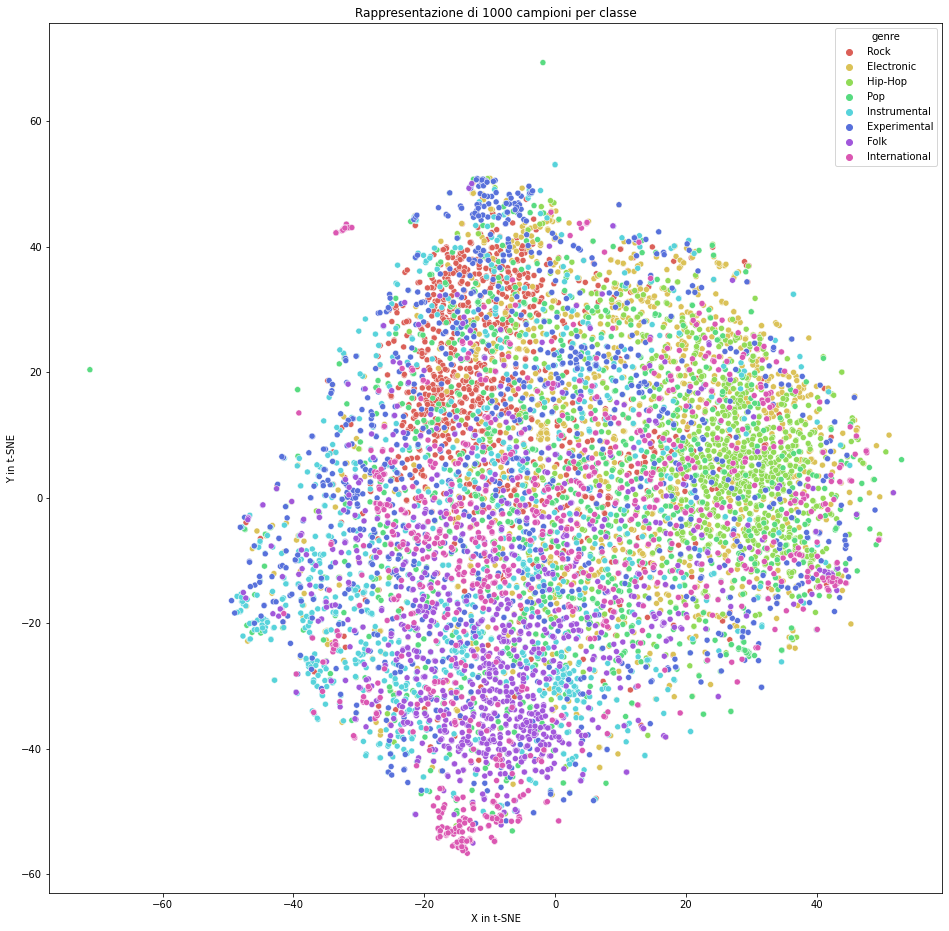

In [82]:
df_subset['X in t-SNE'] = tsne_results[:,0]
df_subset['Y in t-SNE'] = tsne_results[:,1]
plt.figure(figsize=(16,16))
plt.title('Rappresentazione di 1000 campioni per classe')

sns.scatterplot(
    x="X in t-SNE", y="Y in t-SNE",
    hue="genre",
    palette=sns.color_palette("hls", 8),
    data=df_subset,
    legend="full",
    alpha=0.99
)

In [71]:
df_all = df.loc[:, df.columns != 'genre']
time_start = time.time()
tsne = TSNE(early_exaggeration = 30.0, n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(df_all)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 27789 samples in 1.850s...
[t-SNE] Computed neighbors for 27789 samples in 306.117s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27789
[t-SNE] Computed conditional probabilities for sample 2000 / 27789
[t-SNE] Computed conditional probabilities for sample 3000 / 27789
[t-SNE] Computed conditional probabilities for sample 4000 / 27789
[t-SNE] Computed conditional probabilities for sample 5000 / 27789
[t-SNE] Computed conditional probabilities for sample 6000 / 27789
[t-SNE] Computed conditional probabilities for sample 7000 / 27789
[t-SNE] Computed conditional probabilities for sample 8000 / 27789
[t-SNE] Computed conditional probabilities for sample 9000 / 27789
[t-SNE] Computed conditional probabilities for sample 10000 / 27789
[t-SNE] Computed conditional probabilities for sample 11000 / 27789
[t-SNE] Computed conditional probabilities for sample 12000 / 27789
[t-SNE] Computed conditional probabilities for 

<AxesSubplot:title={'center':"Rappresentazione dell'intero dataset"}, xlabel='X in t-SNE', ylabel='Y in t-SNE'>

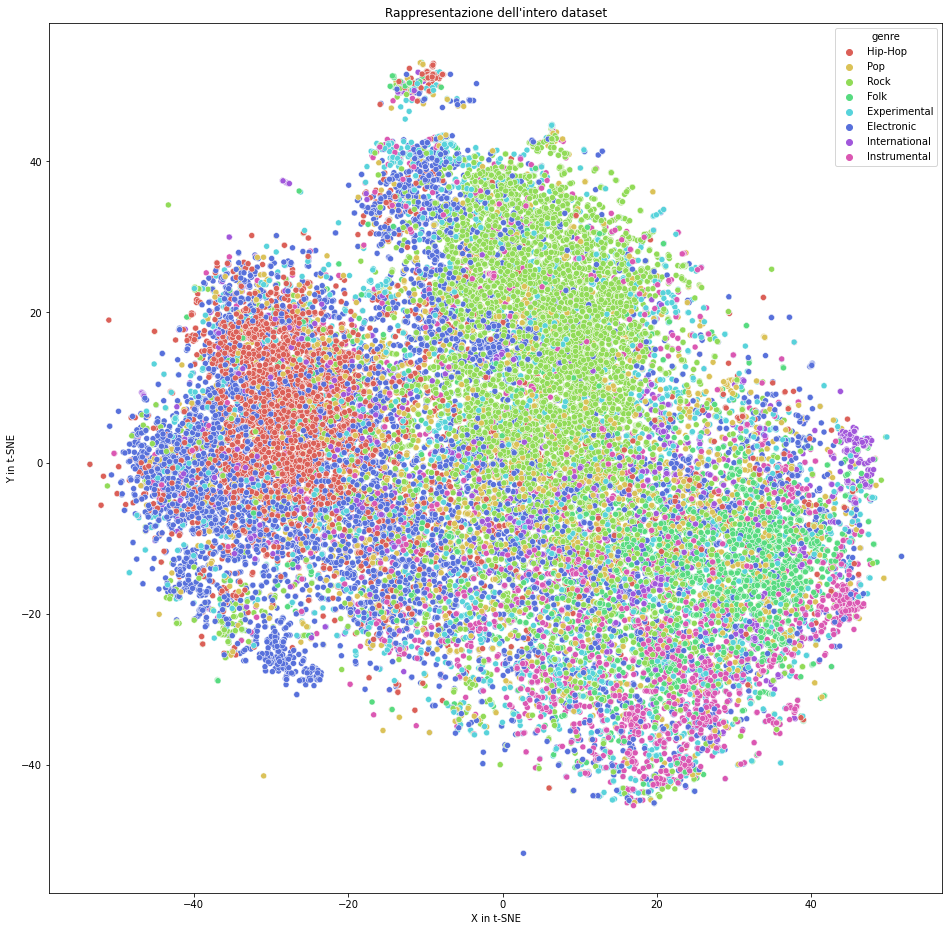

In [78]:
df['X in t-SNE'] = tsne_results[:,0]
df['Y in t-SNE'] = tsne_results[:,1]
plt.figure(figsize=(16,16))
plt.title("Rappresentazione dell'intero dataset")

sns.scatterplot(
    x="X in t-SNE", y="Y in t-SNE",
    hue="genre",
    palette=sns.color_palette("hls", 8),
    data=df,
    legend="full",
    alpha=0.99
)